## Loading A Halo Photonics Doppler lidar .hpl processed file.

In [1]:
import xradar as xd
import xarray as xr
import matplotlib.pyplot as plt
from open_radar_data import DATASETS

Opening a Halo Photonics Doppler lidar .hpl file.

We use the `xd.io.open_hpl_datatree` in order to load the Halo Photonics Doppler lidar data. After that we will need to enter in the latitude and longitude in order to properly georeference the data. The .hpl file does not contain the latitude, longitude, or altitude of the lidar, so these need to be entered in as keywords as a part of the  `backend_kwargs` argument to `xd.io.open_hpl_datatree`.

In this example, we are using the coordinates of the Doppler lidar at the Nantucket Wastewater Management Facility, deployed as as part of the DOE Energy Effciency and Renewable Energy Office's [3rd Wind Forecast Improvement Project](https://www2.whoi.edu/site/wfip3/).

In [4]:
ds = xd.io.open_hpl_datatree(DATASETS.fetch('User1_184_20240601_013257.hpl'),
                             sweep=[0,1,2,3,4,5,6,7,8], 
                             backend_kwargs=dict(latitude=41.24276244459537, longitude=-70.1070364814594))

In [5]:
ds

<xarray.Dataset> Size: 228kB
Dimensions:                (time: 35, range: 400, sweep: 10)
Coordinates:
  * range                  (range) float64 3kB 15.0 45.0 ... 1.196e+04 1.198e+04
  * time                   (time) datetime64[ns] 280B 2024-06-01T01:33:19.360...
Dimensions without coordinates: sweep
Data variables: (12/17)
    intensity              (time, range) float32 56kB ...
    mean_doppler_velocity  (time, range) float32 56kB ...
    backscatter            (time, range) float32 56kB ...
    spectral_width         (time, range) float32 56kB ...
    pitch                  (time) float32 140B ...
    roll                   (time) float32 140B ...
    ...                     ...
    latitude               float32 4B ...
    longitude              float32 4B ...
    altitude               float32 4B ...
    sweep_start_ray_index  (sweep) float32 40B ...
    sweep_end_ray_index    (sweep) float32 40B ...
    antenna_transition     (time) float32 140B ...

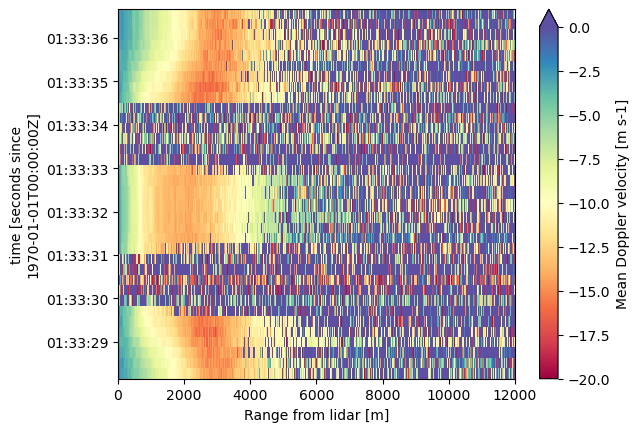

In [34]:
ds['sweep_2']['mean_doppler_velocity'].plot(vmin=-20, vmax=0, cmap='Spectral')

In order to plot each sweep, we need to georeference the underlying sweeps.

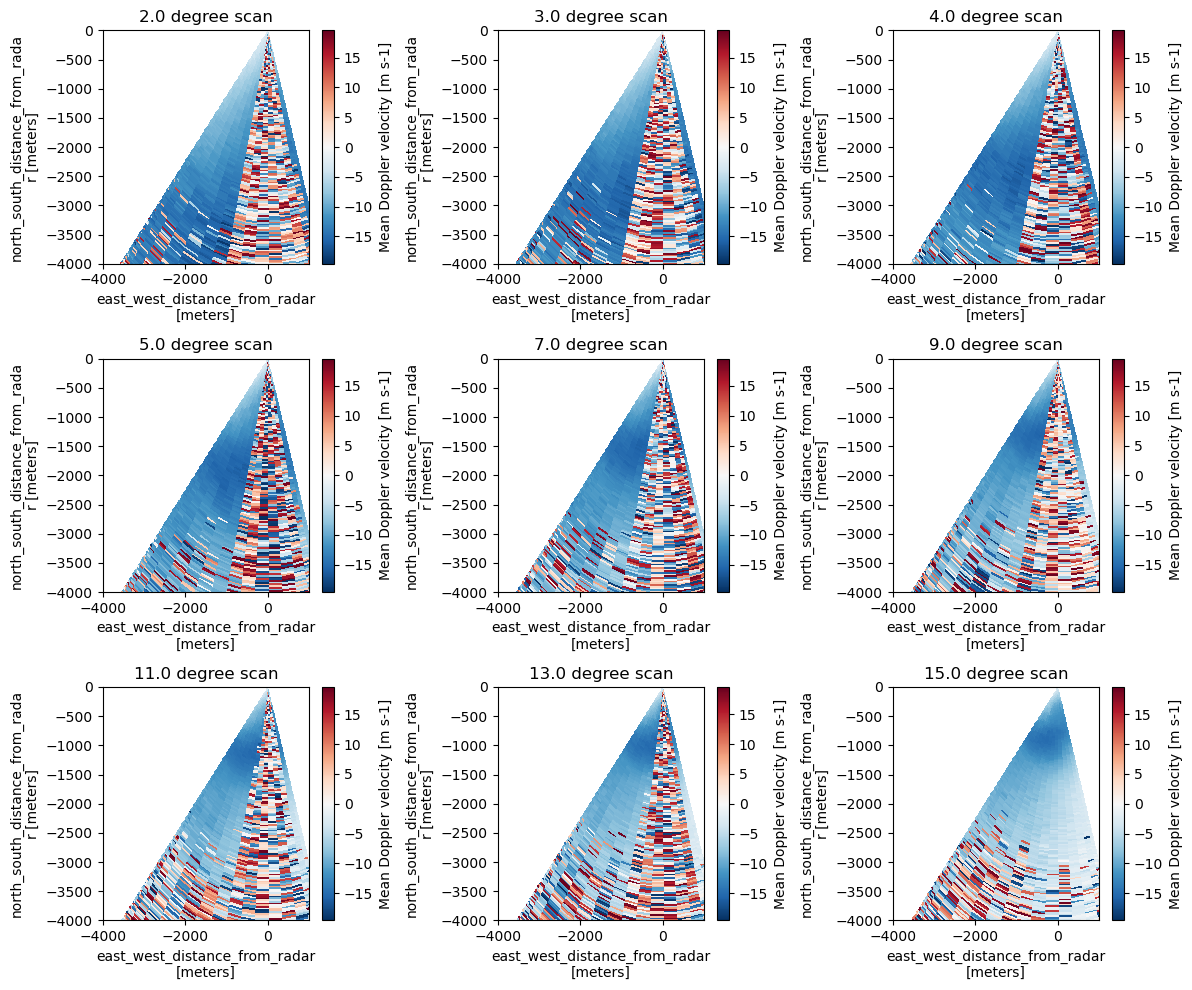

In [54]:
fig, ax = plt.subplots(3, 3, figsize=(12, 10))
for sweep in range(9):
    sweep_ds = xd.georeference.get_x_y_z(ds["sweep_%d" % sweep])
    sweep_ds = sweep_ds.set_coords(["x", "y", "z", "time", "range"])
    sweep_ds["mean_doppler_velocity"].plot(x="x", y="y", ax=ax[int(sweep / 3), sweep % 3])
    ax[int(sweep / 3), sweep % 3].set_title('%2.1f degree scan' % sweep_ds['fixed_angle'].values[sweep])
    ax[int(sweep / 3), sweep % 3].set_ylim([-4000, 0])
    ax[int(sweep / 3), sweep % 3].set_xlim([-4000, 1000])
fig.tight_layout()